In [4]:
import numpy as np
import matplotlib.pyplot as plt
import h5py as h5
import os
import glob
from os import walk
from matplotlib.gridspec import GridSpec
from IPython.display import display, clear_output
from nano_lab import experiments,get_data
import pandas as pd
import nano_lab as lab
import plotly.graph_objects as go
from plotly.subplots import make_subplots
exp= lab.experiments('nano-lab','nsom','fg163r',False)
exp.dframe

,No. Dir,Name Dir
0,0,2022-10-20-nsom.h5
1,1,2022-10-23-nsom.h5
2,2,2022-10-25-nsom.h5
3,3,2022-10-28-nsom.h5
4,4,2022-11-28-nsom.h5
5,5,2022-12-02-nsom.h5
6,6,2022-12-02-nsom_2.h5
7,7,2022-12-03-nsom.h5


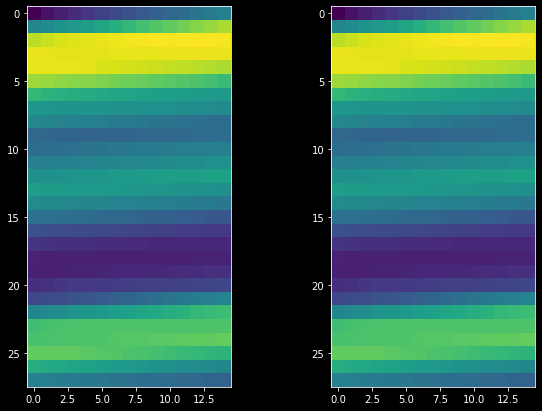

In [6]:
exp=get_data('nano-lab','nsom','fg163r',True)
meas = exp.exp_meas
if meas:
    attrs, data = exp.get_spectra(meas[-5])
else :
    print('Error')
    
afm=data[0][:,:,0]
afm/=afm.max()

afm_r  = (afm/afm.mean())-1

fig, ax = plt.subplots(1,2,figsize=(10,7))
ax[0].imshow(afm)
ax[1].imshow(afm_r)
plt.show()

# fig = go.Figure(data=[go.Surface(z=afm_r)])
# fig.update_layout(title=' ', autosize=False,
#                   width=500, height=500,
#                   margin=dict(l=65, r=50, b=65, t=90))
# fig.show()

In [8]:
len(meas)

8

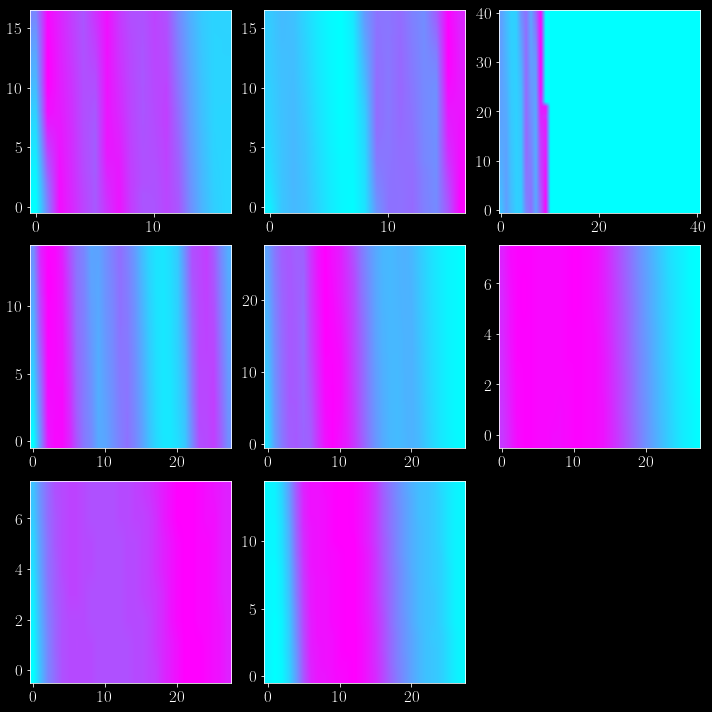

In [56]:
ncols = 3
nrows=(len(meas)/ncols) if isinstance(len(meas)/ncols, int)==True else int((len(meas)/ncols)+1)



fig, ax = plt.subplots(nrows,ncols,figsize=(10,10),frameon=True,facecolor='black')
#plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0.3, wspace = 0.3)


plt.rcParams['xtick.labelsize']     = 17
plt.rcParams['ytick.labelsize']     = 17
plt.rcParams['text.usetex'] = True

count = 0
for i in range(nrows):
    for j in range(ncols):
        if count < len(meas):
            attrs,data = exp.get_spectra(meas[count])
            ax[i,j].imshow(data[0][:,:,0].T,aspect='auto',interpolation='bilinear',origin='lower',cmap='cool')
        else:
            fig.delaxes(ax[i,j])
            break
        count+=1
plt.tight_layout()
plt.show()

In [16]:
exp.exp_meas

['/media/labfiles/lab-exps/nano-lab/fg163r/2022-10-20-nsom.h5',
 '/media/labfiles/lab-exps/nano-lab/fg163r/2022-10-23-nsom.h5',
 '/media/labfiles/lab-exps/nano-lab/fg163r/2022-10-25-nsom.h5',
 '/media/labfiles/lab-exps/nano-lab/fg163r/2022-10-28-nsom.h5',
 '/media/labfiles/lab-exps/nano-lab/fg163r/2022-11-28-nsom.h5',
 '/media/labfiles/lab-exps/nano-lab/fg163r/2022-12-02-nsom.h5',
 '/media/labfiles/lab-exps/nano-lab/fg163r/2022-12-02-nsom_2.h5',
 '/media/labfiles/lab-exps/nano-lab/fg163r/2022-12-03-nsom.h5']